## Sea-Ice Model Package (SPyIce)

The SPyIce package is a software tool that enables 1D finite difference simulation for vertical transport equations. It specifically focuses on thermal diffusion with the influence of salinity and physical properties. The package utilizes the Thomas tridiagonal solver as the solver algorithm. With SPyIce, users can model and analyze the behavior of temperature, salinity, and other relevant variables in a vertical system. It provides a comprehensive framework for studying the thermal diffusion process and its interaction with salinity in various scenarios. Hydra is used to automate the simulation runs of the Sea-Ice Model. It is used to manage and run sea ice simulations, making it easier for users to explore different scenarios and optimize their models.

### Package Demo Example

#### 1. Import Packages

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline
from omegaconf import OmegaConf

from spyice.main_process import create_output_directory
from spyice.postprocess import Analysis, VisualiseModel
from spyice.utils import ConfigSort
from spyice.models import SeaIceModel
from spyice.preprocess import PreProcess

#### 2.0 Define Inputs and Project Output paths

In [2]:
# creates a OmegaConf object from a dictionary
constants_dict = {"constants": "real", "dt": 47.0, "S_IC": "S34", "iter_max": 1000}
config_raw = OmegaConf.create(constants_dict)
config = ConfigSort.getconfig_dataclass(config_raw, config_type="jupyter")

base_dir = Path.cwd()
output_base_dir = Path(base_dir, "output")
wo_hydra_dir = Path(output_base_dir, "without_hydra")
out_dir_final = create_output_directory(wo_hydra_dir)

#### 3.0 Preprocessing, Running and Analysis of Sea-Ice Model

Preprocessing...
User Configuration Data Setup Complete...
Geometry Data Setup Complete...
Results Data Setup Complete...
Time step set to: 47.0s
Applied Initial & Boundary Conditions...
Preprocessing done.
Running model...
|████████████████████████████████████████⚠︎ (!) 999/1000 [100%] in 10.0s (99.68/s
Model run complete and Ready for Analysis.
Running error analysis...
Calculating errors...


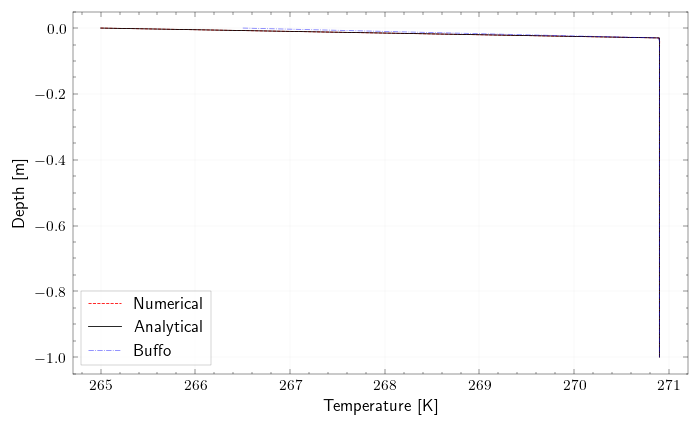

In [3]:
preprocess_data, userinput_data = PreProcess.get_variables(config, out_dir_final)
results_data = SeaIceModel.get_results(preprocess_data, userinput_data)
analysis_data = Analysis.get_error_results(
    t_k_diff=results_data.t_k_diff, t_stefan_diff=results_data.t_stefan_diff
)

#### 4.0 Visualization of Model with VisualiseModel 

In [4]:
model_visualization_object = VisualiseModel(
    user_input_dataclass=userinput_data,
    results_dataclass=results_data,
    error_analysis_dataclass=analysis_data,
)

Visualisation object created...


Plotting Temperature errors using inf norm...


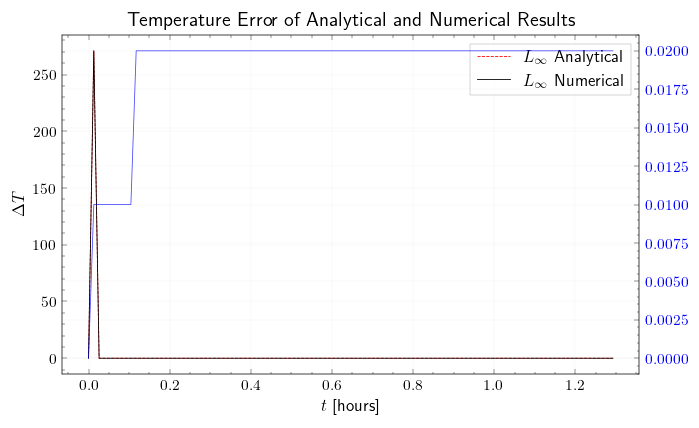

In [5]:
# Plots the Temperature Difference between Analytical and Numerical Solutions
model_visualization_object.plot_error_temp(100, norm="inf", savefig=False)


Plotting Depth over time...


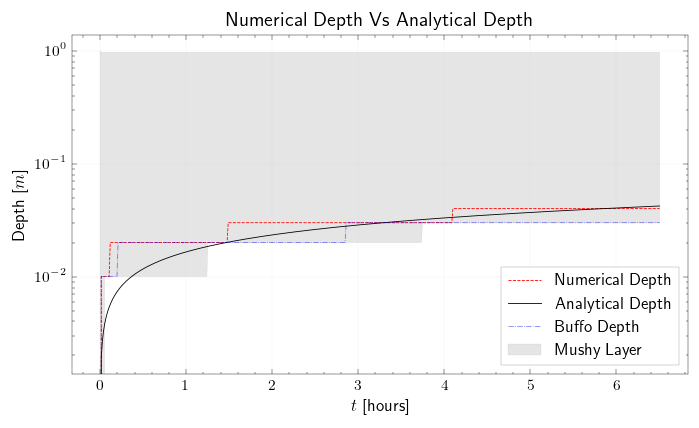

In [6]:
# Plots the interface tracking over time for Analytical and Numerical Solutions
model_visualization_object.plot_depth_over_time(savefig=True)


In [7]:
import os

from hydra import (
    compose,
    initialize,
)
from omegaconf import OmegaConf

# import the main process class
from spyice.main_process import MainProcess

To run the Sea-Ice Model using Hydra and the `MainProcess` script, users simply need to initialize Hydra, load the configuration file, specify any desired overrides, and then create an instance of the `MainProcess` class. The `run_model()` method is then called to execute the simulation. This streamlined process makes it simple for users to run the model with different configurations and analyze the results.

Preprocessing...
User Configuration Data Setup Complete...
Geometry Data Setup Complete...
Results Data Setup Complete...
Time step set to: 47.0s
Applied Initial & Boundary Conditions...
Preprocessing done.
Running model...
|████████████████████████████████████████⚠︎ (!) 999/1000 [100%] in 10.0s (100.24/
Model run complete and Ready for Analysis.
Running error analysis...
Calculating errors...
Postprocessing...
Visualisation object created...
Plotting Temperature errors using inf norm...
Plotting Depth over time...
Plotting Temperature evolution at 0.1m...
Postprocessing done.


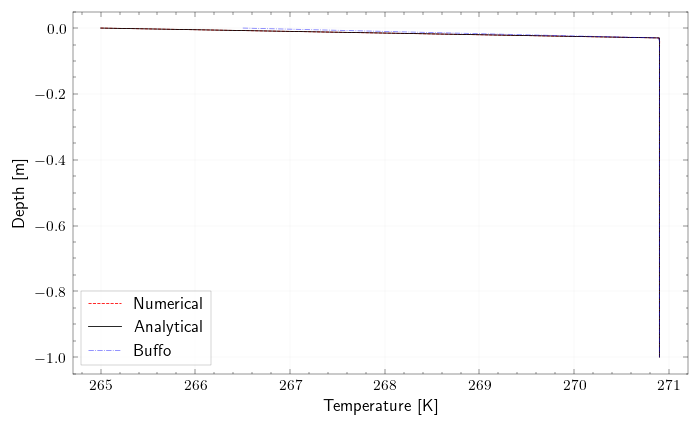

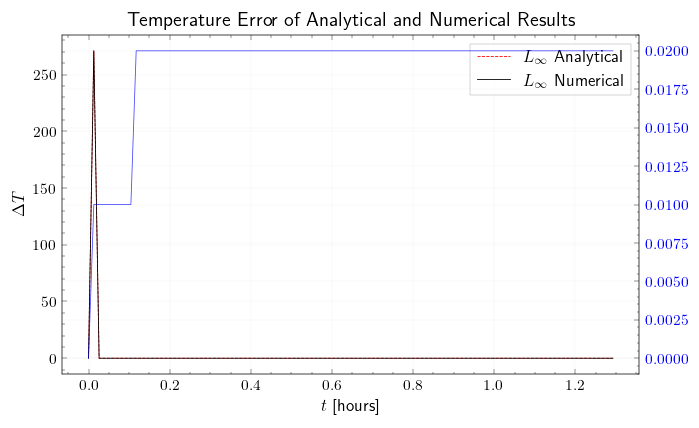

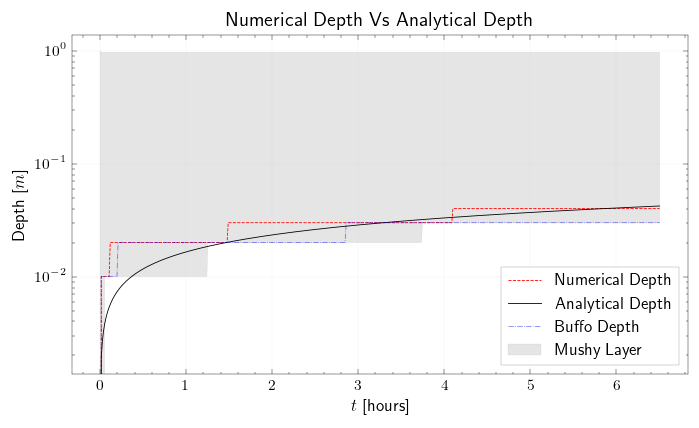

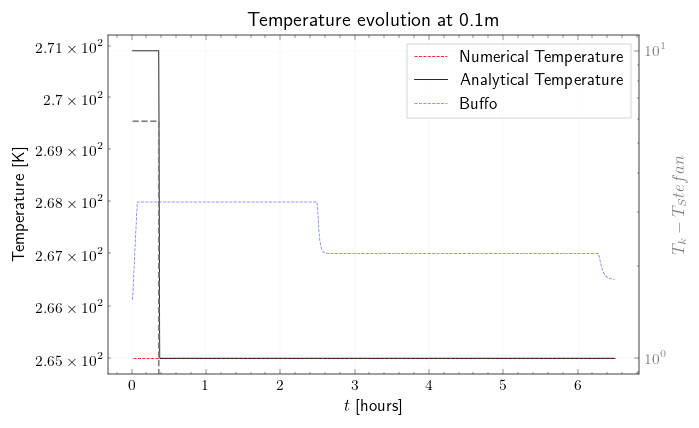

In [8]:
with initialize(version_base=None, config_path="conf"):
    cfg = compose(
        config_name="config.yaml",
        overrides=["iter_max=iter_max1000", "dt=dt47", "S_IC=S34"],
    )
    out_hydra_dir = Path(output_base_dir, "with_hydra")
    main = MainProcess(cfg, out_hydra_dir)
    main.run_model()